In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.shape

(13320, 9)

In [3]:
df1.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
for i,j in df1.groupby("area_type"):
    print(i,j)

Built-up  Area             area_type   availability               location       size  \
2      Built-up  Area  Ready To Move            Uttarahalli      3 BHK   
13     Built-up  Area  Ready To Move              Gottigere      2 BHK   
20     Built-up  Area  Ready To Move                Kengeri      1 BHK   
27     Built-up  Area         20-Dec             Whitefield      3 BHK   
34     Built-up  Area  Ready To Move          Kasturi Nagar      3 BHK   
...               ...            ...                    ...        ...   
13280  Built-up  Area  Ready To Move               Sarjapur      3 BHK   
13307  Built-up  Area  Ready To Move           Billekahalli      3 BHK   
13308  Built-up  Area  Ready To Move      Bannerghatta Road      3 BHK   
13315  Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13317  Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   

       society total_sqft  bath  balcony  price  
2          NaN       1440   2.0      3.0   62.

In [7]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df2 = df1.drop(["area_type","society","balcony","availability"],axis =1)
df2.shape

(13320, 5)

In [9]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3["bhk"] = df3["size"].apply(lambda x : x.split(" ")[0])

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_26056/25070349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x : x.split(" ")[0])


In [13]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
df3["bhk"].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [18]:
df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
def convert_sqft_to_num(x):
    token = x.split("-")
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_sqft_to_num("213")

213.0

In [21]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [24]:
(2100 + 2850)/2

2475.0

In [25]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]

In [26]:
df5.location.nunique()

1304

In [27]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df5.location = df5.location.apply(lambda x : x.strip())
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
location_stats = df5["location"].value_counts()
location_stats

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [30]:
location_stats[location_stats <= 10].tail()

Vasantapura main road             1
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
Abshot Layout                     1
Name: location, dtype: int64

In [31]:
len(location_stats[location_stats <= 10])

1052

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [33]:
df5["location"].nunique()

1293

In [34]:
df5.location = df5.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)

In [35]:
df5["location"].nunique()

242

In [36]:
df5["bhk"] = df5["bhk"].astype("float")

In [37]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [38]:
df5.shape

(13246, 7)

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
for keys,values in df6.groupby("location"):
    print(keys,end = ",")
#     print((value)) values are df for each location


1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachi

In [42]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df6.groupby("location"): #keys are location value and subdf is df for that given location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index =True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [43]:
df7.location.value_counts()

other                   2301
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
HAL 2nd Stage              4
Thyagaraja Nagar           4
Vishwapriya Layout         4
Marsur                     3
Name: location, Length: 242, dtype: int64

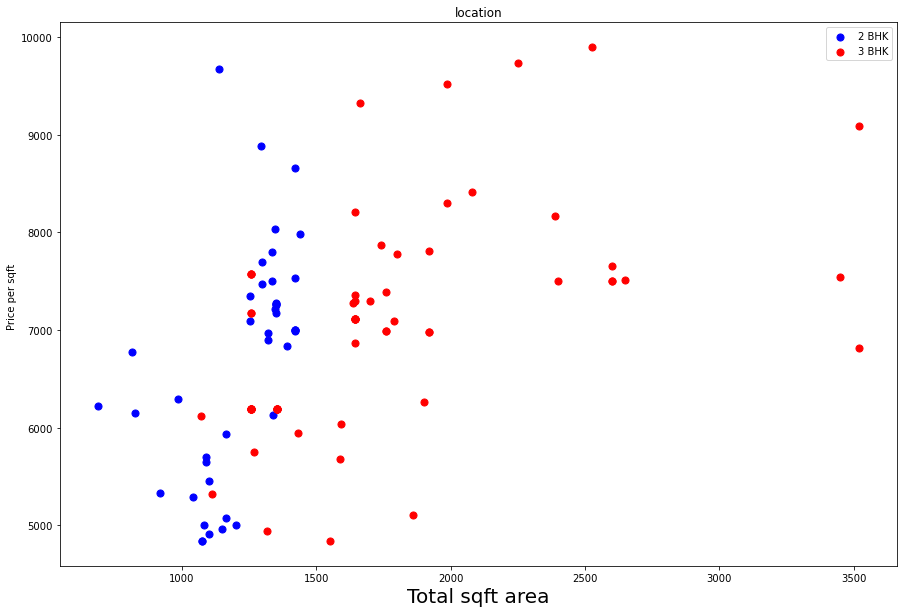

In [44]:
def plot_scatter_chart(df,location):
    plt.figure(figsize = (15,10))
    bhk2 = df[(df["location"] == location) & (df.bhk == 2)]
    bhk3 = df[(df["location"] == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color = "blue",label = "2 BHK",s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color = "red",label = "3 BHK",s = 50)
    plt.xlabel("Total sqft area",fontsize =20)
    plt.ylabel("Price per sqft ")
    plt.legend()
    plt.title("location")

plot_scatter_chart(df7,"Hebbal")

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]  # it tell rows 
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk - 1)  # now check is for lower bhk then upper
            if stats and stats["count"]>5: # means stats should not be empty and if rows >5
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values) # mean lower bhk mean is greater than upper bhk
    return df.drop(exclude_indices,axis = "index")

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

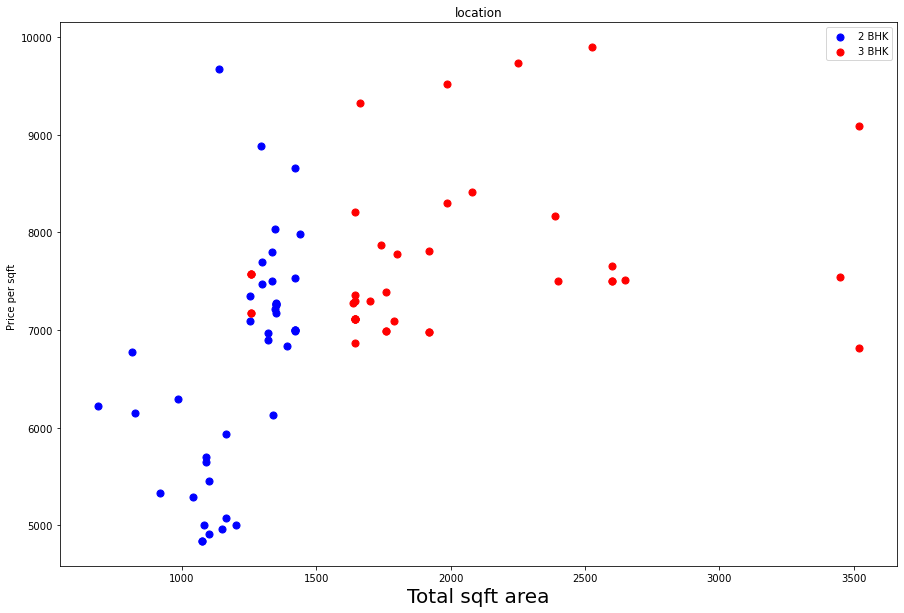

In [46]:
plot_scatter_chart(df8,"Hebbal") # as we can see most of the outliers is eliminated but still left some 

In [47]:
import seaborn as sns

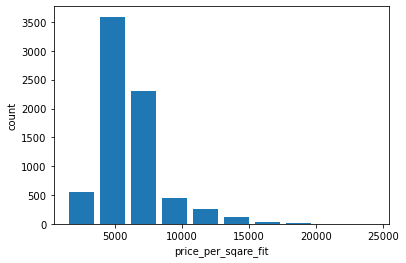

In [48]:
plt.hist(df8.price_per_sqft,rwidth = .8)
plt.xlabel("price_per_sqare_fit")
plt.ylabel("count")
plt.show()

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[(df8.bath>(df8.bhk + 2))]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [51]:
df9 = df8[(df8.bath<(df8.bhk + 2))]
df9.shape

(7251, 7)

In [52]:
df10 = df9.drop(["size","price_per_sqft"],axis =1)

In [53]:
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0


In [54]:
df11 = pd.get_dummies(df10)
df11.head(2)

,total_sqft,bath,price,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11.shape

(7251, 246)

In [56]:
x = df11.drop(["price","location_other"],axis = 1)
y = df11.price

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size = .8)

In [58]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)
model_linear.score(x_test,y_test)

0.8052544046008375

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size = .2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv = cv )

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [61]:
def find_best_model_using_GridSearchCV(x,y):
    model_dict = {"LinearRegression" :{"model": LinearRegression(),
                                       "parameter" : {
                                                      "normalize" : [True,False]
                                                      }
                                       },
                  "Lasso" : {"model" : Lasso(),
                             "parameter" : {
                                            "alpha":[1,2] ,
                                           "selection" :["cyclic","random"]
                                             }
                            },
                  "DecisionTreeRegressor" : {"model" : DecisionTreeRegressor(),
                                             "parameter" : {"criterion": ["mse", "friedman_mse"],
                                                            "splitter": ["best", "random"]
                                                           }

                                            }     

                 }
    s = []
    for model_name,model_para in model_dict.items():
        cv = ShuffleSplit(n_splits=5,test_size = .2,random_state=0)
        model = GridSearchCV(model_para["model"],model_para["parameter"],cv = 5,return_train_score= False)
        model.fit(x,y)
        s.append({"model":model_name,
                "best_para":model.best_params_,
                "best_score":model.best_score_})
    return pd.DataFrame(s,columns = ["model","best_para","best_score"])

find_best_model_using_GridSearchCV(x,y)

,model,best_para,best_score
0,LinearRegression,{'normalize': False},-2.403782e+15
1,Lasso,"{'alpha': 2, 'selection': 'random'}",6.723107e-01
2,DecisionTreeRegressor,"{'criterion': 'mse', 'splitter': 'best'}",4.961925e-01


In [62]:
# from here we can conclude model_linear is best model

In [63]:
x.head()

,total_sqft,bath,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x.columns

Index(['total_sqft', 'bath', 'bhk', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=244)

In [65]:
np.where(x.columns == "location_5th Phase JP Nagar")

(array([8], dtype=int64),)

In [66]:
np.where(x.columns == "location_5th Phase JP Nagar")[0]

array([8], dtype=int64)

In [67]:
np.where(x.columns == "location_5th Phase JP Nagar")[0][0]

8

In [68]:
# x = np.zeros(len(x.columns))
# x

In [69]:
x.columns

Index(['total_sqft', 'bath', 'bhk', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=244)

In [70]:
import numpy as np

In [71]:
def predict_price(location,sqft,bath,bhk):
    
    loc_index = np.where(x.columns == location)[0][0]    ## to find position of column 
    
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1
    return model_linear.predict([X])[0]




In [72]:
predict_price('location_5th Phase JP Nagar',1000,2,2)  # it comes in lakh

42.509838139022776

In [73]:
predict_price('location_Yeshwanthpur',1000,2,2)  # it comes in lakh

67.71693531351704